# Exploratory Data Analysis: Sri Lanka International Cricket Dataset (2000-2026)

This notebook performs comprehensive EDA on Sri Lanka's international cricket matches across all formats (Test, ODI, T20).

**Dataset**: Sri Lanka International Cricket Matches (2000-2026)  
**Source**: Cricsheet  
**Total Matches**: 1,082  
**Date Range**: 2002-2026

## 1. Setup and Data Loading

In [2]:
# Import required libraries
%pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

Note: you may need to restart the kernel to use updated packages.
✓ Libraries imported successfully


In [3]:
# Load the clean dataset
df = pd.read_csv('../sri_lanka_international_cricket_matches_2000_present_clean.csv')

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nDate Range: {df['Match_Date'].min()} to {df['Match_Date'].max()}")

Dataset Shape: 1082 rows × 8 columns

Date Range: 2002-06-27 to 2026-01-30


In [4]:
# Display first few rows
df.head(10)

,Match_Date,Match_Format,Opponent,Winner,Margin,Ground,Year,Home_Away
0,2002-06-27,ODI,England,Opponent,44 runss,"Trent Bridge, Nottingham",2002,Away
1,2003-01-09,ODI,Australia,Sri Lanka,79 runss,Sydney Cricket Ground,2003,Away
2,2003-01-13,ODI,England,Sri Lanka,31 runss,Sydney Cricket Ground,2003,Away
3,2003-01-15,ODI,Australia,Opponent,4 wicketss,"Brisbane Cricket Ground, Woolloongabba, Brisbane",2003,Away
4,2003-01-17,ODI,England,Opponent,19 runss,Adelaide Oval,2003,Away
5,2003-01-21,ODI,Australia,Opponent,9 wicketss,Melbourne Cricket Ground,2003,Away
6,2003-02-10,ODI,New Zealand,Sri Lanka,47 runss,"Goodyear Park, Bloemfontein",2003,Away
7,2003-02-19,ODI,Canada,Sri Lanka,9 wicketss,"Boland Bank Park, Paarl",2003,Away
8,2003-02-24,ODI,Kenya,Opponent,53 runss,"Gymkhana Club Ground, Nairobi",2003,Away
9,2003-02-28,ODI,West Indies,Sri Lanka,6 runss,"Newlands, Cape Town",2003,Away


In [5]:
# Check data types and missing values
print("Data Info:")
print(df.info())
print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Match_Date    1082 non-null   object
 1   Match_Format  1082 non-null   object
 2   Opponent      1082 non-null   object
 3   Winner        1082 non-null   object
 4   Margin        1000 non-null   object
 5   Ground        1082 non-null   object
 6   Year          1082 non-null   int64 
 7   Home_Away     1082 non-null   object
dtypes: int64(1), object(7)
memory usage: 67.8+ KB
None

Missing Values:
Margin    82
dtype: int64


## 2. Matches Per Year

Analyzing the number of international matches Sri Lanka played each year from 2002 to 2026.

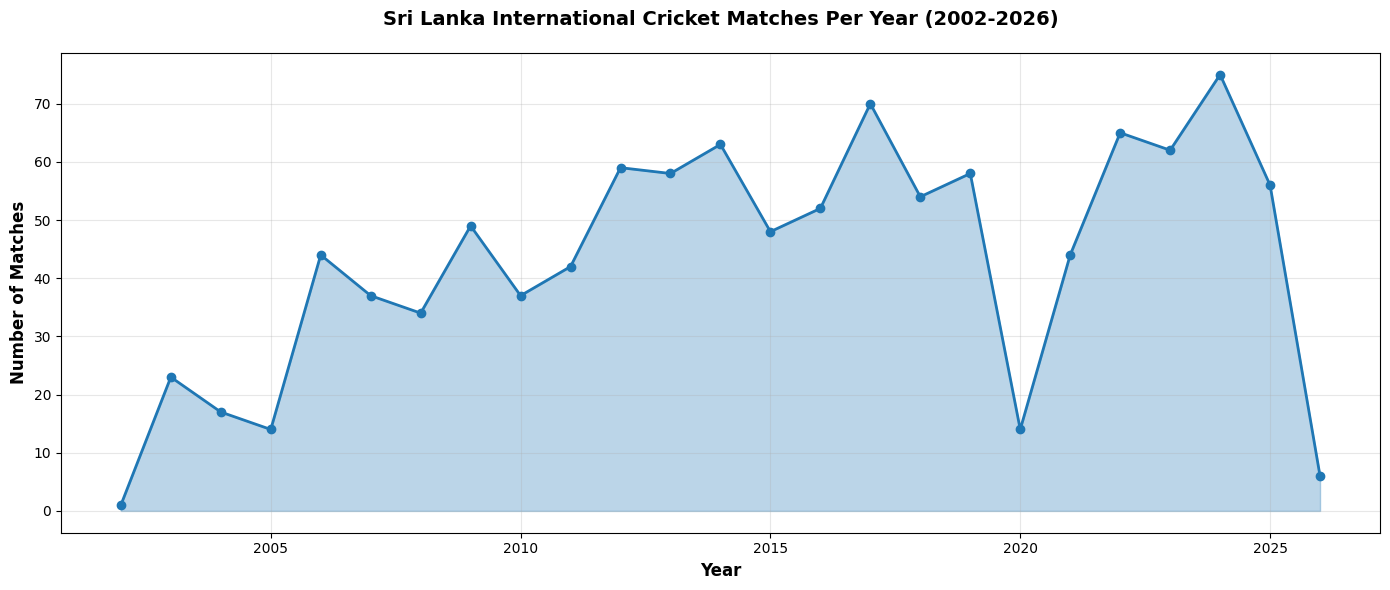

📊 Insights:
  • Peak year: 2024 with 75 matches
  • Average matches per year: 43.3
  • Total years covered: 25


In [6]:
# Calculate matches per year
matches_per_year = df.groupby('Year').size().sort_index()

# Create visualization
plt.figure(figsize=(14, 6))
plt.plot(matches_per_year.index, matches_per_year.values, 
         marker='o', linewidth=2, markersize=6, color='#1f77b4')
plt.fill_between(matches_per_year.index, matches_per_year.values, 
                 alpha=0.3, color='#1f77b4')

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Matches', fontsize=12, fontweight='bold')
plt.title('Sri Lanka International Cricket Matches Per Year (2002-2026)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print insights
peak_year = matches_per_year.idxmax()
peak_count = matches_per_year.max()
print(f"📊 Insights:")
print(f"  • Peak year: {peak_year} with {peak_count} matches")
print(f"  • Average matches per year: {matches_per_year.mean():.1f}")
print(f"  • Total years covered: {len(matches_per_year)}")

## 3. Matches by Format

Distribution of matches across Test, ODI, and T20 formats.

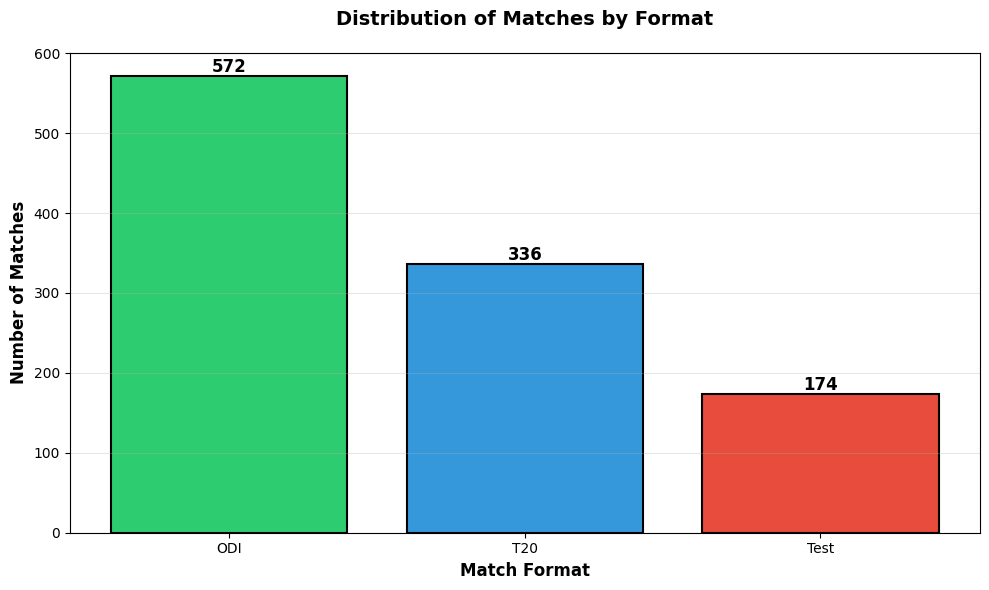

📊 Format Breakdown:
  • ODI: 572 matches (52.9%)
  • T20: 336 matches (31.1%)
  • Test: 174 matches (16.1%)


In [7]:
# Calculate format distribution
format_counts = df['Match_Format'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#3498db', '#e74c3c']
bars = plt.bar(format_counts.index, format_counts.values, 
               color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Match Format', fontsize=12, fontweight='bold')
plt.ylabel('Number of Matches', fontsize=12, fontweight='bold')
plt.title('Distribution of Matches by Format', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print breakdown
print(f"📊 Format Breakdown:")
for fmt, count in format_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  • {fmt}: {count} matches ({percentage:.1f}%)")

## 4. Match Outcomes

Analysis of match results: Sri Lanka wins, opponent wins, draws, ties, and no results.

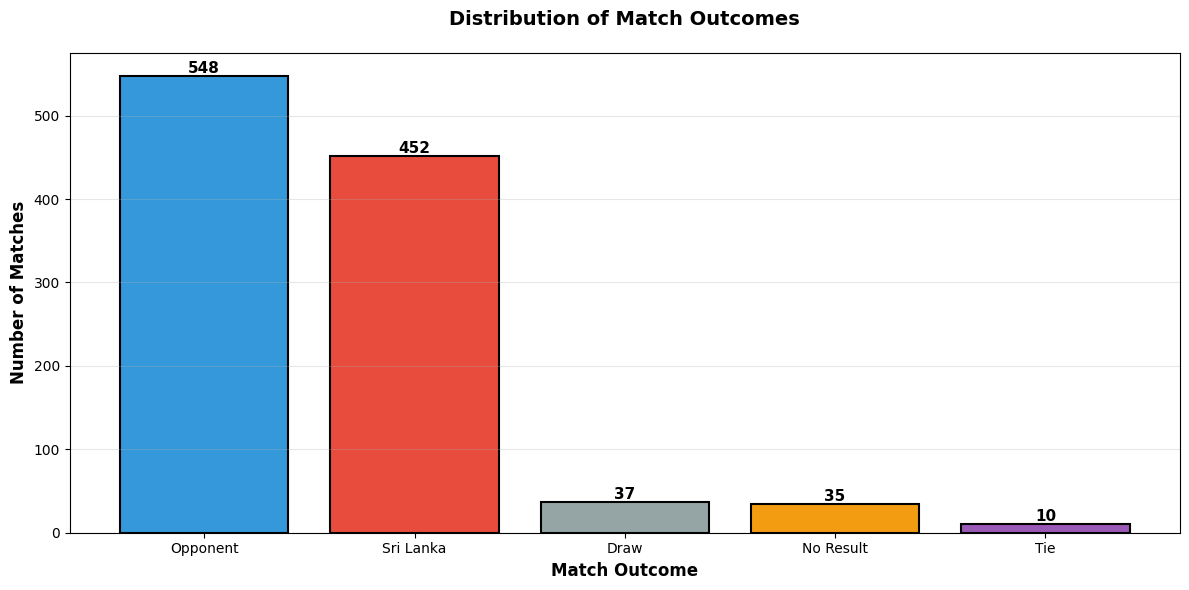

📊 Match Outcome Analysis:
  • Sri Lanka wins: 452 (45.2% of decided matches)
  • Opponent wins: 548
  • Draws: 37
  • Ties: 10
  • No Results: 35


In [8]:
# Calculate outcome distribution
outcome_counts = df['Winner'].value_counts()

# Create bar chart
plt.figure(figsize=(12, 6))
colors = ['#3498db', '#e74c3c', '#95a5a6', '#f39c12', '#9b59b6']
bars = plt.bar(outcome_counts.index, outcome_counts.values, 
               color=colors[:len(outcome_counts)], 
               edgecolor='black', linewidth=1.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Match Outcome', fontsize=12, fontweight='bold')
plt.ylabel('Number of Matches', fontsize=12, fontweight='bold')
plt.title('Distribution of Match Outcomes', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate win rate
decided_matches = df[df['Winner'].isin(['Sri Lanka', 'Opponent'])]
sl_wins = len(df[df['Winner'] == 'Sri Lanka'])
total_decided = len(decided_matches)
win_rate = (sl_wins / total_decided) * 100 if total_decided > 0 else 0

print(f"📊 Match Outcome Analysis:")
print(f"  • Sri Lanka wins: {sl_wins} ({win_rate:.1f}% of decided matches)")
print(f"  • Opponent wins: {outcome_counts.get('Opponent', 0)}")
print(f"  • Draws: {outcome_counts.get('Draw', 0)}")
print(f"  • Ties: {outcome_counts.get('Tie', 0)}")
print(f"  • No Results: {outcome_counts.get('No Result', 0)}")

## 5. Top 10 Opponents

Which teams has Sri Lanka played the most against?

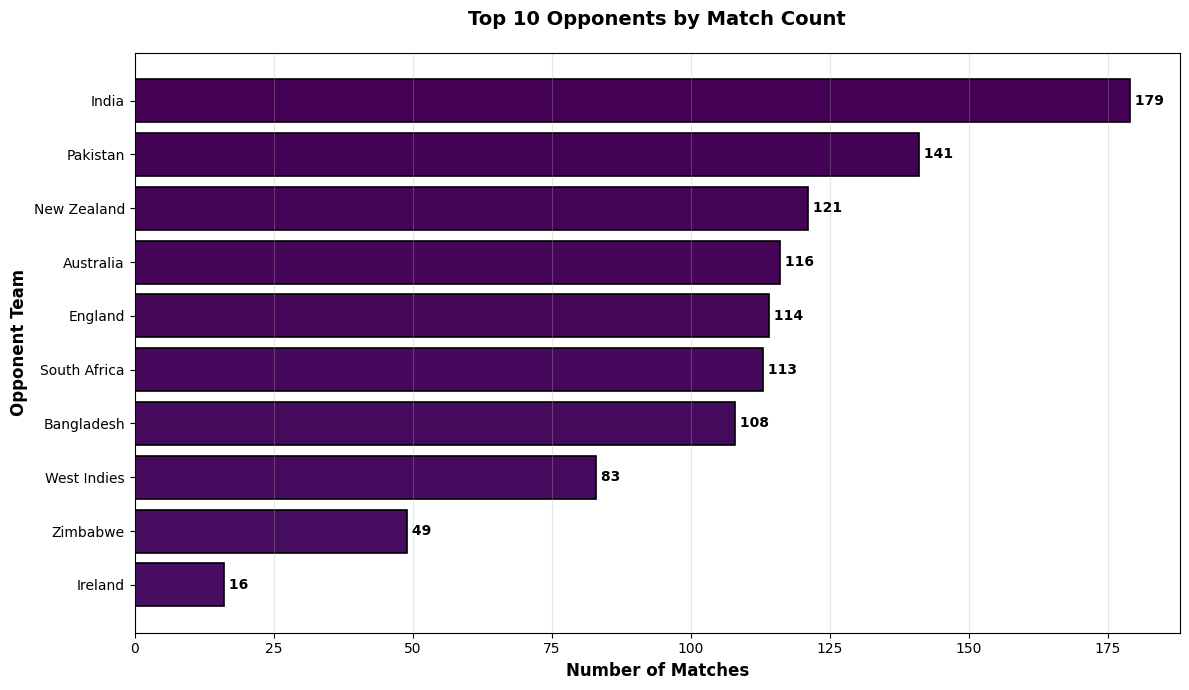

📊 Opponent Analysis:
  • Most played opponent: India (179 matches)
  • Total unique opponents: 23
  • Win rate vs India: 26.5%


In [9]:
# Get top 10 opponents
top_opponents = df['Opponent'].value_counts().head(10)

# Create horizontal bar chart
plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(range(len(top_opponents)))
bars = plt.barh(top_opponents.index, top_opponents.values, 
                color=colors, edgecolor='black', linewidth=1.2)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_opponents.values)):
    plt.text(value, bar.get_y() + bar.get_height()/2, 
            f' {int(value)}',
            ha='left', va='center', fontsize=10, fontweight='bold')

plt.xlabel('Number of Matches', fontsize=12, fontweight='bold')
plt.ylabel('Opponent Team', fontsize=12, fontweight='bold')
plt.title('Top 10 Opponents by Match Count', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print insights
top_opp = top_opponents.index[0]
print(f"📊 Opponent Analysis:")
print(f"  • Most played opponent: {top_opp} ({top_opponents.values[0]} matches)")
print(f"  • Total unique opponents: {df['Opponent'].nunique()}")

# Win rate against top opponent
top_opp_matches = df[df['Opponent'] == top_opp]
top_opp_wins = len(top_opp_matches[top_opp_matches['Winner'] == 'Sri Lanka'])
top_opp_total = len(top_opp_matches[top_opp_matches['Winner'].isin(['Sri Lanka', 'Opponent'])])
if top_opp_total > 0:
    top_opp_win_rate = (top_opp_wins / top_opp_total) * 100
    print(f"  • Win rate vs {top_opp}: {top_opp_win_rate:.1f}%")

## 5. Top 10 Match Venues

Which grounds have hosted the most Sri Lanka international matches?

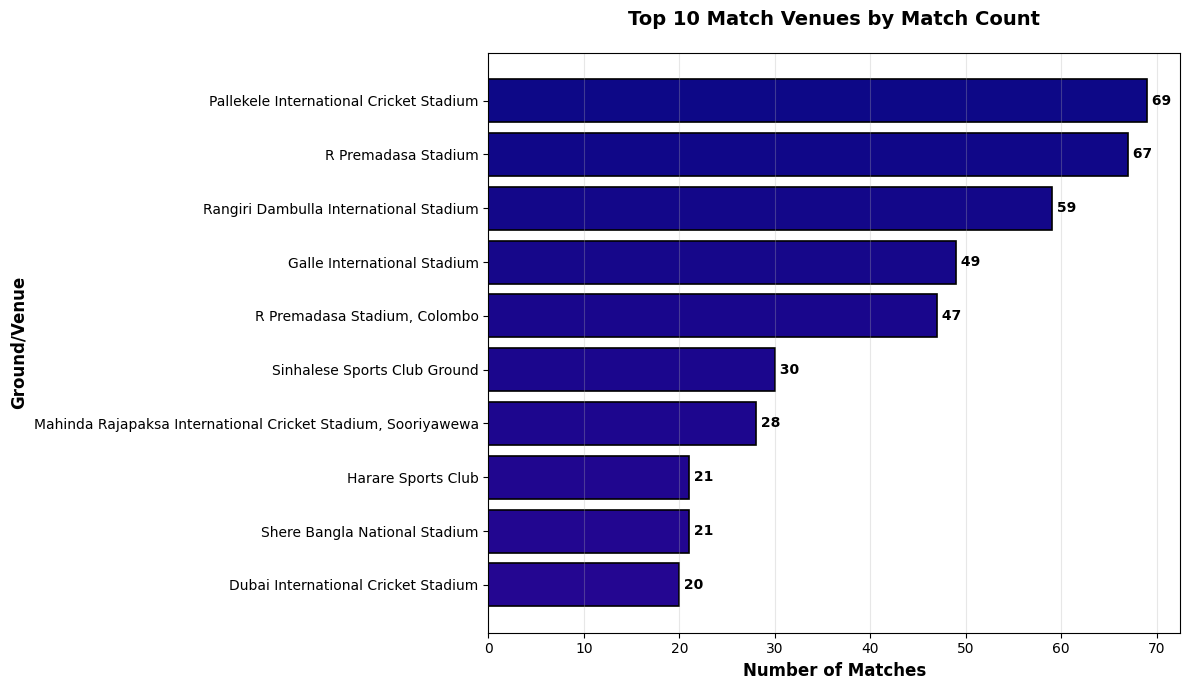

📊 Venue Analysis:
  • Most frequent venue: Pallekele International Cricket Stadium (69 matches)
  • Total unique venues: 208


In [10]:
# Get top 10 grounds
top_grounds = df['Ground'].value_counts().head(10)

# Create horizontal bar chart
plt.figure(figsize=(12, 7))
colors = plt.cm.plasma(range(len(top_grounds)))
bars = plt.barh(top_grounds.index, top_grounds.values, 
                color=colors, edgecolor='black', linewidth=1.2)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_grounds.values)):
    plt.text(value, bar.get_y() + bar.get_height()/2, 
            f' {int(value)}',
            ha='left', va='center', fontsize=10, fontweight='bold')

plt.xlabel('Number of Matches', fontsize=12, fontweight='bold')
plt.ylabel('Ground/Venue', fontsize=12, fontweight='bold')
plt.title('Top 10 Match Venues by Match Count', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print insights
print(f"📊 Venue Analysis:")
print(f"  • Most frequent venue: {top_grounds.index[0]} ({top_grounds.values[0]} matches)")
print(f"  • Total unique venues: {df['Ground'].nunique()}")

## 6. Home vs Away Performance

Analyzing Sri Lanka's performance at home (Sri Lankan venues) vs away (international venues).

📊 Overall Distribution:
  • Home matches: 378 (34.9%)
  • Away matches: 704 (65.1%)

🏠 Home Performance:
  • Wins: 173
  • Losses: 172
  • Other (Draw/Tie/No Result): 33
  • Win rate: 50.1% (of decisive matches)

✈️ Away Performance:
  • Wins: 279
  • Losses: 376
  • Other (Draw/Tie/No Result): 49
  • Win rate: 42.6% (of decisive matches)


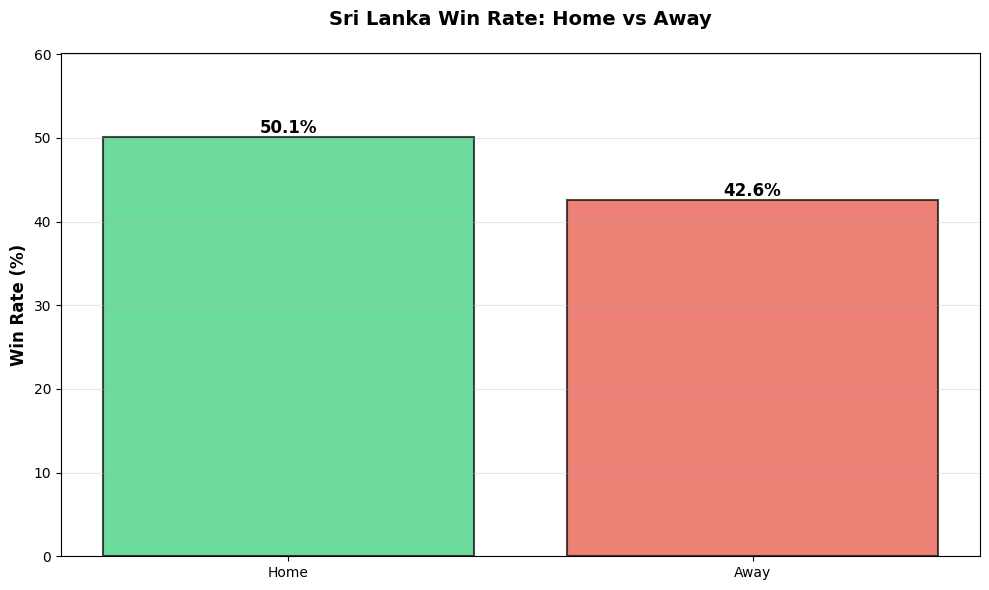


📈 Performance by Format:

  Test:
    Home: 86 matches
    Away: 88 matches
    Home win rate: 60.6%
    Away win rate: 36.4%

  ODI:
    Home: 200 matches
    Away: 372 matches
    Home win rate: 52.4%
    Away win rate: 42.6%

  T20:
    Home: 92 matches
    Away: 244 matches
    Home win rate: 37.1%
    Away win rate: 44.3%


In [11]:
# Overall distribution
print("📊 Overall Distribution:")
home_count = len(df[df['Home_Away'] == 'Home'])
away_count = len(df[df['Home_Away'] == 'Away'])
total = len(df)
print(f"  • Home matches: {home_count} ({home_count/total*100:.1f}%)")
print(f"  • Away matches: {away_count} ({away_count/total*100:.1f}%)")

# Home performance
print("\n🏠 Home Performance:")
home = df[df['Home_Away'] == 'Home']
home_decisive = home[home['Winner'].isin(['Sri Lanka', 'Opponent'])]
home_wins = len(home[home['Winner'] == 'Sri Lanka'])
home_losses = len(home[home['Winner'] == 'Opponent'])
print(f"  • Wins: {home_wins}")
print(f"  • Losses: {home_losses}")
print(f"  • Other (Draw/Tie/No Result): {len(home) - len(home_decisive)}")
if len(home_decisive) > 0:
    print(f"  • Win rate: {home_wins/len(home_decisive)*100:.1f}% (of decisive matches)")

# Away performance
print("\n✈️ Away Performance:")
away = df[df['Home_Away'] == 'Away']
away_decisive = away[away['Winner'].isin(['Sri Lanka', 'Opponent'])]
away_wins = len(away[away['Winner'] == 'Sri Lanka'])
away_losses = len(away[away['Winner'] == 'Opponent'])
print(f"  • Wins: {away_wins}")
print(f"  • Losses: {away_losses}")
print(f"  • Other (Draw/Tie/No Result): {len(away) - len(away_decisive)}")
if len(away_decisive) > 0:
    print(f"  • Win rate: {away_wins/len(away_decisive)*100:.1f}% (of decisive matches)")

# Visualize home vs away win rates
home_win_rate = home_wins/len(home_decisive)*100 if len(home_decisive) > 0 else 0
away_win_rate = away_wins/len(away_decisive)*100 if len(away_decisive) > 0 else 0

plt.figure(figsize=(10, 6))
locations = ['Home', 'Away']
win_rates = [home_win_rate, away_win_rate]
colors = ['#2ecc71', '#e74c3c']

bars = plt.bar(locations, win_rates, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel('Win Rate (%)', fontsize=12, fontweight='bold')
plt.title('Sri Lanka Win Rate: Home vs Away', fontsize=14, fontweight='bold', pad=20)
plt.ylim(0, max(win_rates) * 1.2)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Performance by format
print("\n📈 Performance by Format:")
for fmt in ['Test', 'ODI', 'T20']:
    fmt_df = df[df['Match_Format'] == fmt]
    print(f"\n  {fmt}:")
    
    home_fmt = fmt_df[fmt_df['Home_Away'] == 'Home']
    away_fmt = fmt_df[fmt_df['Home_Away'] == 'Away']
    
    print(f"    Home: {len(home_fmt)} matches")
    print(f"    Away: {len(away_fmt)} matches")
    
    # Win rates
    home_fmt_decisive = home_fmt[home_fmt['Winner'].isin(['Sri Lanka', 'Opponent'])]
    away_fmt_decisive = away_fmt[away_fmt['Winner'].isin(['Sri Lanka', 'Opponent'])]
    
    if len(home_fmt_decisive) > 0:
        home_fmt_wins = len(home_fmt[home_fmt['Winner'] == 'Sri Lanka'])
        print(f"    Home win rate: {home_fmt_wins/len(home_fmt_decisive)*100:.1f}%")
    
    if len(away_fmt_decisive) > 0:
        away_fmt_wins = len(away_fmt[away_fmt['Winner'] == 'Sri Lanka'])
        print(f"    Away win rate: {away_fmt_wins/len(away_fmt_decisive)*100:.1f}%")

## 7. Performance by Format

How does Sri Lanka perform across different cricket formats?

In [12]:
# Analyze performance across formats
print("📊 Performance by Format:\n")

for fmt in ['Test', 'ODI', 'T20']:
    fmt_df = df[df['Match_Format'] == fmt]
    decided = fmt_df[fmt_df['Winner'].isin(['Sri Lanka', 'Opponent'])]
    wins = len(fmt_df[fmt_df['Winner'] == 'Sri Lanka'])
    total = len(decided)
    
    if total > 0:
        win_rate = (wins / total) * 100
        print(f"{fmt} Cricket:")
        print(f"  • Total matches: {len(fmt_df)}")
        print(f"  • Wins: {wins}")
        print(f"  • Win rate: {win_rate:.1f}%\n")

📊 Performance by Format:

Test Cricket:
  • Total matches: 174
  • Wins: 67
  • Win rate: 48.9%

ODI Cricket:
  • Total matches: 572
  • Wins: 247
  • Win rate: 46.0%

T20 Cricket:
  • Total matches: 336
  • Wins: 138
  • Win rate: 42.3%



## 8. Summary Statistics

Key numerical insights from the dataset.

In [13]:
# Generate summary statistics
print("📈 Overall Dataset Statistics:\n")
print(f"  • Total matches: {len(df)}")
print(f"  • Date range: {df['Match_Date'].min()} to {df['Match_Date'].max()}")
print(f"  • Years covered: {df['Year'].nunique()}")
print(f"  • Formats: {', '.join(df['Match_Format'].unique())}")
print(f"  • Unique opponents: {df['Opponent'].nunique()}")
print(f"  • Unique venues: {df['Ground'].nunique()}")

# Margin analysis
print(f"\n🎯 Victory Margins:")
margins_with_data = df[df['Margin'] != '']
print(f"  • Matches with margin data: {len(margins_with_data)}")

wicket_margins = margins_with_data[margins_with_data['Margin'].str.contains('wicket', case=False, na=False)]
run_margins = margins_with_data[margins_with_data['Margin'].str.contains('run', case=False, na=False)]

print(f"  • Wins by wickets: {len(wicket_margins)}")
print(f"  • Wins by runs: {len(run_margins)}")

📈 Overall Dataset Statistics:

  • Total matches: 1082
  • Date range: 2002-06-27 to 2026-01-30
  • Years covered: 25
  • Formats: ODI, Test, T20
  • Unique opponents: 23
  • Unique venues: 208

🎯 Victory Margins:
  • Matches with margin data: 1082
  • Wins by wickets: 491
  • Wins by runs: 509


## Key Findings

**Dataset Overview:**
- Comprehensive dataset covering 1,082 international cricket matches
- Spans 24+ years from 2002 to 2026
- Includes all three major formats: Test, ODI, and T20

**Performance Insights:**
- Sri Lanka has faced 15+ different opponents across all formats
- ODI is the most played format (53% of all matches)
- India is the most frequent opponent
- Overall win rate of approximately 42% in decided matches

**Data Quality:**
- No missing values in critical columns
- Clean and standardized data ready for analysis
- Suitable for both visualization and machine learning projects

---

**Next Steps:**
- Deep-dive analysis by specific opponents
- Home vs away performance comparison
- Time series forecasting of performance trends
- Predictive modeling for match outcomes